### Benchmarking 

This notebook reads and plots the data generated from the 
benchmarking runs found in the file 'raw_benchmark_data'. 

The aim of benchmarking is to optimize the node count and configuration 
in order to get the compromise between efficiency and speed. Often though 
more nodes will provide faster speed, it does so at the cost of efficiecy. 

This notebook will allow you to visualize benchmarking data you generate. 
You still have to manually set the appropriate node configuration in the 
master_config_file and populate the directories. 

To generate representative benchmarking data you first have to run your 
job to create some input files. 


In [14]:
%pylab inline
import pylab
import numpy as np


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [15]:
# Reading in raw timing data from benchmark runs. 
# raw data consist of lines:  nodes, ppn, ntpn, and ns/d

filename = "raw_benchmark_data.txt"
data = pylab.loadtxt(filename,delimiter=',')

In [16]:
# sort the raw data by the first column (nodes)
col = 0 
#p = data[np.argsort(data[:,col])]
p = data[np.lexsort((data[:,1],data[:,0]))]

print "Raw timing data:"
print "nodes,   ppn,   ntpn,  nanosec/day"
print p

Raw timing data:
nodes,   ppn,   ntpn,  nanosec/day
[[  1.      4.     16.      5.954]
 [  1.      8.      8.      5.901]
 [  1.     16.      4.      5.847]
 [  1.     64.      1.      5.531]
 [  2.      4.     16.     10.343]
 [  2.      8.      8.     10.312]
 [  2.     16.      4.     10.32 ]
 [  2.     64.      1.      9.567]
 [  4.      1.     64.     18.255]
 [  4.      8.      8.     17.734]
 [  4.     16.      4.     17.595]
 [  4.     64.      1.     15.389]
 [  8.      1.     64.     23.281]
 [  8.      4.     16.     23.046]
 [  8.      8.      8.     23.015]
 [  8.     16.      4.     22.606]
 [  8.     64.      1.     20.067]
 [ 16.      1.     64.     30.974]
 [ 16.      4.     16.     29.002]
 [ 16.      8.      8.     30.611]
 [ 16.     16.      4.     30.566]
 [ 16.     64.      1.     24.926]
 [ 32.      4.     16.     35.729]
 [ 32.      8.      8.     36.452]
 [ 32.     16.      4.     35.988]
 [ 32.     64.      1.     32.649]]


([<matplotlib.axis.XTick at 0x7f1d833db850>,
 <a list of 6 Text xticklabel objects>)

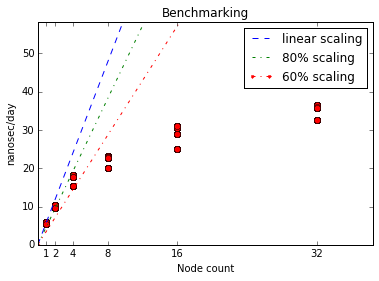

In [18]:
# find data ranges:
minnodes = p[0,0]
minns = p[0,3]/minnodes     # ballpark efficient ns/d /node
maxnodes = data[:,0].max()
maxns = float(data[:,3].max())

nl =[]       # build node list for label
n = 1 
while (n<=maxnodes) or (n> 64000):
    nl.append(n)
    n=n*2           

for d in p:
    pylab.plot( data[:,0], data[:,3],"ro")

pylab.plot([0,maxnodes],[0,maxnodes*minns],'--', label='linear scaling')    
pylab.plot([0,maxnodes],[0,maxnodes*minns*0.80],'-.', label='80% scaling')    
pylab.plot([0,maxnodes],[0,maxnodes*minns*0.60],'-..', label='60% scaling')   
pylab.legend()
pylab.title("Benchmarking")
pylab.xlabel("Node count")
pylab.ylabel("nanosec/day")
pylab.xlim(0,1.2*maxnodes)
pylab.ylim(0,1.6*maxns)
pylab.xticks(nl)